# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** MUHAMMAD HAFIDH ROSYADI
- **Email:** mhafidhrosyadi@gmail.com
- **ID Dicoding:** Muhammad Hafidh Rosyadi

## Menentukan Pertanyaan Bisnis

- Permintaan penjualan paling banyak terjadi pada bulan apa ?
- Apa kategori yang paling laris dan paling tidak laris?
- produk apa yang memiliki rata - rata review_score paling buruk?


1. menggunakan df_orders V
2. menggunakan join order_item dengan produk V
3. menggunakan df_order_review dan df_order_item V

## Import Semua Packages/Library yang Digunakan

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [37]:
df_produk = pd.read_csv('./data/olist_products_dataset.csv')
df_order_item = pd.read_csv('./data/olist_order_items_dataset.csv')
df_order_payment = pd.read_csv('./data/olist_order_payments_dataset.csv')
df_order_review = pd.read_csv('./data/olist_order_reviews_dataset.csv')
df_customer = pd.read_csv('./data/olist_customers_dataset.csv')
df_kategori = pd.read_csv('./data/product_category_name_translation.csv')
df_orders = pd.read_csv('./data/olist_orders_dataset.csv')
df_seller = pd.read_csv('./data/olist_sellers_dataset.csv')

In [38]:
df_produk.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [39]:
df_order_item.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [40]:
df_order_item.shape


(112650, 7)

In [41]:
df_order_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [42]:
df_kategori.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [43]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [44]:
df_translated_product = pd.merge(
    left=df_produk,
    right=df_kategori,
    how = "left",
    on='product_category_name'
)
df_translated_product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [45]:
#  melakukan join dari order item dan translated product
df_order_product = pd.merge(
    left = df_order_item, 
    right = df_translated_product, 
    how = "left", 
    on = "product_id"
)
df_order_product.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [46]:
# merge order review dan order item untuk kebutuhan rating (4)
df_order_review_order_item = pd.merge(
    left=df_order_review,
    right=df_order_item,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
df_order_review_order_item.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,1.0,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-06 12:48:39,79.79,8.30
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-02-08 10:31:15,149.00,45.12
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:19,179.99,42.85


### Assessing Data

#### disini akan digunakan 3 dataframe utama
1. df_orders
2. df_order_product
3. df_order_review_order_item

##### 1. df_orders

In [47]:
print('Jumlah duplikasi data: ', df_orders.duplicated().sum())
df_orders.info()

Jumlah duplikasi data:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


data tidak ada yang duplikat, namun data order_delivered_carrier_date, order_delivered_customer_date ,order_estimated_delivery_date   memiliki kesalahan tipe data.

In [48]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Masih Terdapat missin value didalam dataframe ini, namun hanya dibutuhkan order_purchase_timestamp untuk pertanyaan pertama.

##### 2. df_order_product

In [49]:
print('Jumlah duplikasi data: ', df_order_product.duplicated().sum())
df_order_product.info()

Jumlah duplikasi data:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   product_category_name          111047 non-null  object 
 8   product_name_lenght            111047 non-null  float64
 9   product_description_lenght     111047 non-null  float64
 10  product_photos_qty             111047 non-null  float64
 11  product_weight_g               112632 non-null  float64
 12  prod

Tidak ada duplikat dan tipe data tjidak ada yang bermasalah.

In [50]:
df_order_product.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1603
product_name_lenght              1603
product_description_lenght       1603
product_photos_qty               1603
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
product_category_name_english    1627
dtype: int64

terdapat missing valued dibagian product_category_name.

In [51]:
df_order_product.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000,111047,111047.000000,111047.000000,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000,111023
unique,98666,NaN,32951,3095,93318,NaN,NaN,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table
freq,21,NaN,527,2033,21,NaN,NaN,11115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11115
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320,NaN,48.775978,787.867029,2.209713,2093.672047,30.153669,16.593766,22.996546,NaN
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405,NaN,10.025581,652.135608,1.721438,3751.596884,16.153449,13.443483,11.707268,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000,NaN,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000,NaN
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000,NaN,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,NaN


##### 3. df_order_review_order_item

In [52]:
print('Jumlah duplikasi data: ', df_order_review_order_item.duplicated().sum())
df_order_review_order_item.info()

Jumlah duplikasi data:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113131 entries, 0 to 113130
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   review_id                113131 non-null  object 
 1   order_id                 113131 non-null  object 
 2   review_score             113131 non-null  int64  
 3   review_comment_title     13523 non-null   object 
 4   review_comment_message   48166 non-null   object 
 5   review_creation_date     113131 non-null  object 
 6   review_answer_timestamp  113131 non-null  object 
 7   order_item_id            112372 non-null  float64
 8   product_id               112372 non-null  object 
 9   seller_id                112372 non-null  object 
 10  shipping_limit_date      112372 non-null  object 
 11  price                    112372 non-null  float64
 12  freight_value            112372 non-null  float64
dtypes: float64(3), int64(1), object(9

In [53]:
df_order_review_order_item.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       99608
review_comment_message     64965
review_creation_date           0
review_answer_timestamp        0
order_item_id                759
product_id                   759
seller_id                    759
shipping_limit_date          759
price                        759
freight_value                759
dtype: int64

terdapat missing value pada product_id yang nanti dibutuhkan untuk analisis lebih lanjut.

### Cleaning Data

In [54]:
datetime_columns = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date', 'order_delivered_customer_date' ,'order_estimated_delivery_date' ]
    
for column in datetime_columns:
    df_orders[column] = pd.to_datetime(df_orders[column])

In [55]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Karena pada df_order_product missing value di product_category_name_english merupakan sebagian kecil maka dapat di imputasi dengan 'others'.

In [56]:
#mengisi missing value tabel df_order_product di product_category_name_english dengan 'others'others', hanya kolom ini saja yang diubah karena kolom ini sja yang dibutuhkan.
df_order_product['product_category_name_english'] = df_order_product['product_category_name_english'].fillna('others')

mengatasi missing value di df_order_review_order_item pada kolom product_id dengan melakukan drop, karena sudah tidak dibuthkan lagi

In [57]:
df_order_review_order_item = df_order_review_order_item.dropna(subset=['product_id'])

In [58]:
df_order_review_order_item.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       98938
review_comment_message     64730
review_creation_date           0
review_answer_timestamp        0
order_item_id                  0
product_id                     0
seller_id                      0
shipping_limit_date            0
price                          0
freight_value                  0
dtype: int64

## Exploratory Data Analysis (EDA)

## Explore kasus 1 penjualan pada setiap bulan.
menambahkan parameter bulan pada setiap data di df_orders dengan strftime()

In [59]:
df_orders['month'] = df_orders['order_purchase_timestamp'].dt.strftime('%B')
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,October
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,July
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,August
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,November
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,February


In [60]:
monthly_counts = df_orders['month'].value_counts()
print(monthly_counts)

month
August       10843
May          10573
July         10318
March         9893
June          9412
April         9343
February      8508
January       8069
November      7544
December      5674
October       4959
September     4305
Name: count, dtype: int64


## Explore kasus 2
menghitung kategori terbesar dan terkecil dengan value_count

In [61]:
category_counts = df_order_product['product_category_name_english'].value_counts()

kecil_to_besar = category_counts.sort_values(ascending=True)[:10]
besar_to_kecil = category_counts.sort_values(ascending=False)[:10]



In [62]:
besar_to_kecil

product_category_name_english
bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
housewares                6964
watches_gifts             5991
telephony                 4545
garden_tools              4347
auto                      4235
Name: count, dtype: int64

In [63]:
kecil_to_besar

product_category_name_english
security_and_services                 2
fashion_childrens_clothes             8
cds_dvds_musicals                    14
la_cuisine                           14
arts_and_craftmanship                24
fashion_sport                        30
home_comfort_2                       30
flowers                              33
music                                38
furniture_mattress_and_upholstery    38
Name: count, dtype: int64

## Explore kasus 3
Produk dengan rata rata review terkecil.

In [64]:
df_order_review_order_item.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,1.0,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-06 12:48:39,79.79,8.30
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-02-08 10:31:15,149.00,45.12
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:19,179.99,42.85


melakukan rata rata dengan group product_id

In [65]:
average_review_score = df_order_review_order_item.groupby('product_id')['review_score'].mean()
average_review_score_sorted = average_review_score.sort_values(ascending=True)[:3]
print(average_review_score_sorted)
# automotivo,bebes


product_id
7f7a6b07907da42addc3ec06b4a62cfb    1.0
a8e59319e3c44b5af3a5412d713af5bb    1.0
33fb5f691f9219b5d60d856191aea6a4    1.0
Name: review_score, dtype: float64


## RFM analysis

In [66]:
df_RFM = pd.merge(
    left=df_customer,
    right=pd.merge(
        left=df_orders,
        right=df_order_product,
        how="inner",
        left_on="order_id",
        right_on="order_id"
    ),
    how="inner",
    left_on="customer_id",
    right_on="customer_id"
)
df_RFM.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort


In [67]:
df_RFM.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
month                               0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1603
product_name_lenght              1603
product_description_lenght       1603
product_photos_qty               1603
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_widt

data sudah aman, data yang kosong diatas tidak diperlukan pada analisis.

In [68]:
df_RFM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    112650 non-null  object        
 1   customer_unique_id             112650 non-null  object        
 2   customer_zip_code_prefix       112650 non-null  int64         
 3   customer_city                  112650 non-null  object        
 4   customer_state                 112650 non-null  object        
 5   order_id                       112650 non-null  object        
 6   order_status                   112650 non-null  object        
 7   order_purchase_timestamp       112650 non-null  datetime64[ns]
 8   order_approved_at              112635 non-null  datetime64[ns]
 9   order_delivered_carrier_date   111456 non-null  datetime64[ns]
 10  order_delivered_customer_date  110196 non-null  datetime64[ns]
 11  

In [95]:
rfm_df=df_RFM.groupby(by="customer_unique_id",as_index=False).agg({
    "order_purchase_timestamp":"max",
    "order_id":"nunique",
    "price":"sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1,18.90
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,180.00


In [96]:
rfm_df["max_order_timestamp"] = pd.to_datetime(rfm_df["max_order_timestamp"])
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = df_orders["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,163
2,0000f46a3911fa3c0805444483337064,1,69.00,586
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,370
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,337


Mengubah tanggal terakhir mengujungi menjadi hari recency.

In [98]:
# output data menjadi csv file
rfm_df.to_csv("rfm_df.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

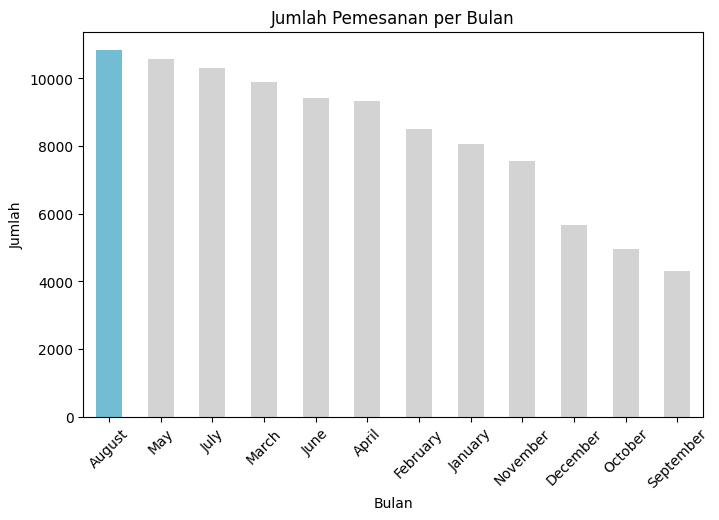

In [94]:
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(8, 5))
monthly_counts.plot(kind='bar',color=colors_)
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.title('Jumlah Pemesanan per Bulan')
plt.xticks(rotation=45)
plt.show()

Dapat dilihat bahwa pada bulan agustus pembelian terjadi sangat besar. sehingga hal tersebut dapat dimanfaatkan untuk persiapan resource.

### Pertanyaan 2:

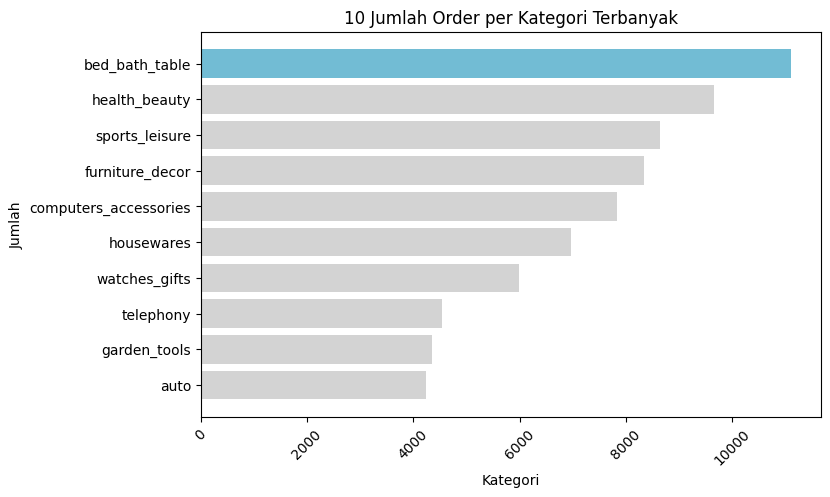

In [90]:
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(8, 5))
# besar_to_kecil.plot(kind='bar')
plt.barh(besar_to_kecil.index, besar_to_kecil.values,color=colors_)
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.title('10 Jumlah Order per Kategori Terbanyak')
plt.xticks(rotation=45)
plt.gca().invert_yaxis() 
plt.show()

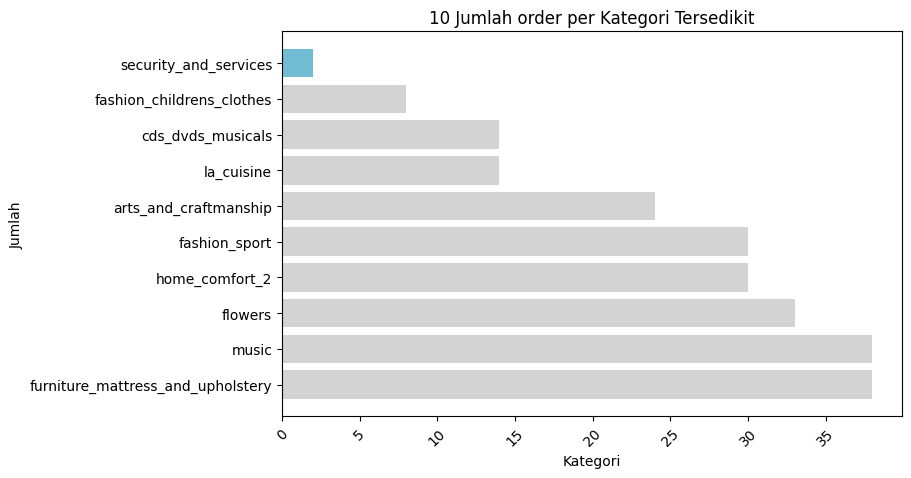

In [88]:
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(8, 5))
# kecil_to_besar.plot(kind='bar')
plt.barh(kecil_to_besar.index, kecil_to_besar.values,color= colors_)
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.title('10 Jumlah order per Kategori Tersedikit')
plt.xticks(rotation=45)
plt.gca().invert_yaxis() 
plt.show()

#### RFM analysis

In [78]:
rfm_recency=rfm_df["recency"].sort_values

Top 5 Customers by Recency:
                            customer_id  frequency  monetary  recency
95083  ff22e30958c13ffe219db7d711e8f564          2    290.00       44
65645  afbcfd0b9c5233e7ccc73428526fbb52          1    457.75       49
92476  f80013faf776e37bcea7634d59c2181e          1     65.00       49
67518  b4dcade04bc548b7e3b0243c801f8c26          1     99.00       49
1538   0421e7a23f21e5d54efed456aedbc513          1    109.90       49


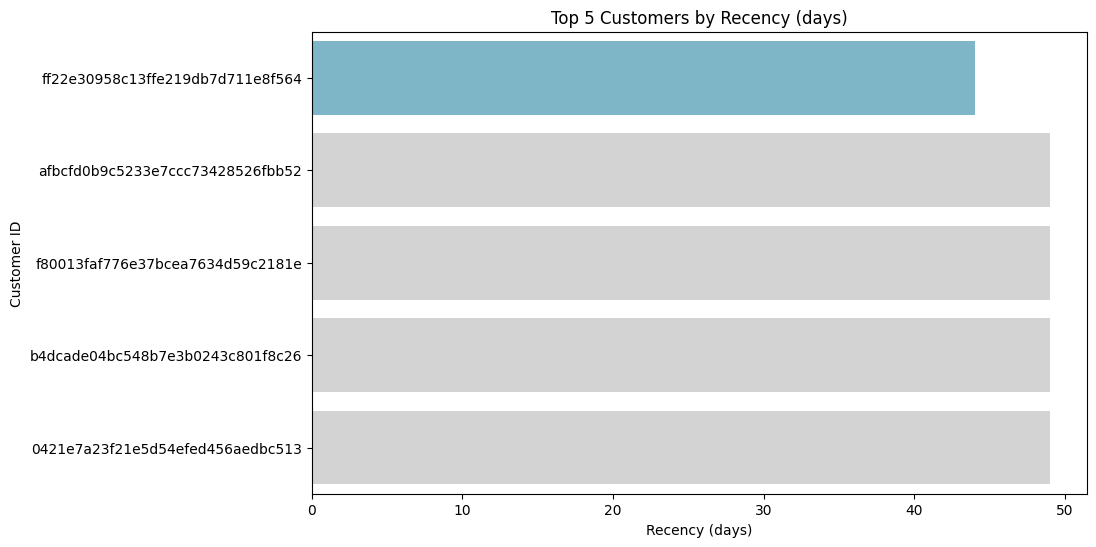


Top 5 Customers by Frequency:
                            customer_id  frequency  monetary  recency
52597  8d50f5eadf50201ccdcedfb9e2ac8455         16    729.62       58
23302  3e43e6105506432c953e165fb2acf44c          9   1000.85      232
10281  1b6c7548a2a1f9037c1fd3ddfed95f33          7    809.21      245
37532  6469f99c1f9dfae7733b25662e7f1782          7    664.20      111
75560  ca77025e7201e3b30c44b472ff346268          7    806.61      138


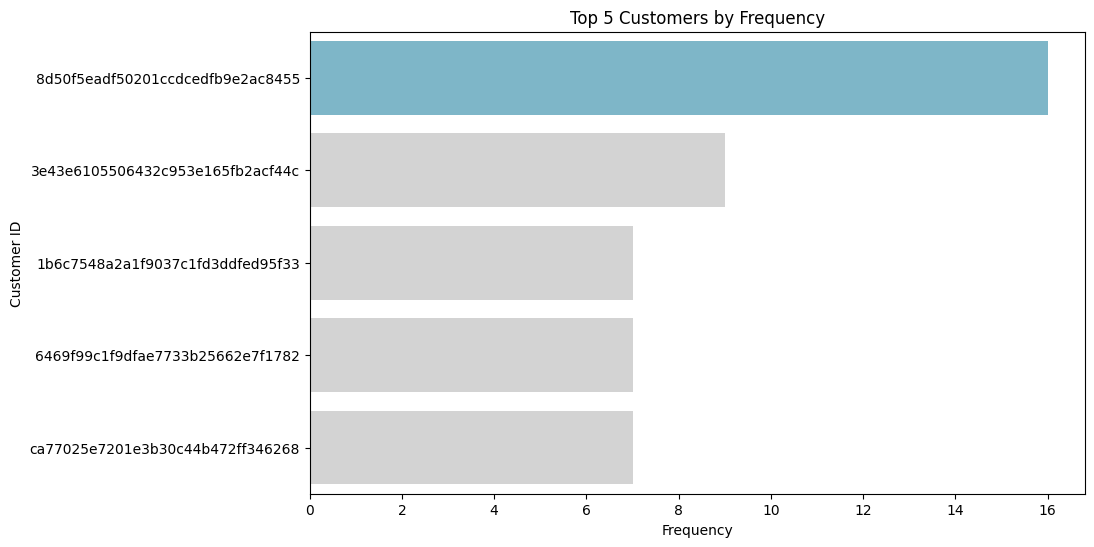


Top 5 Customers by Monetary:
                            customer_id  frequency  monetary  recency
3799   0a0a92112bd4c708ca5fde585afaa872          1   13440.0      383
81388  da122df9eeddfedc1dc1f5349a1a690c          2    7388.0      564
44139  763c8b1c9c68a0229c42c9fc6f662b93          1    7160.0       94
82230  dc4802a71eae9be1dd28f5d788ceb526          1    6735.0      612
26015  459bef486812aa25204be022145caa62          1    6729.0       84


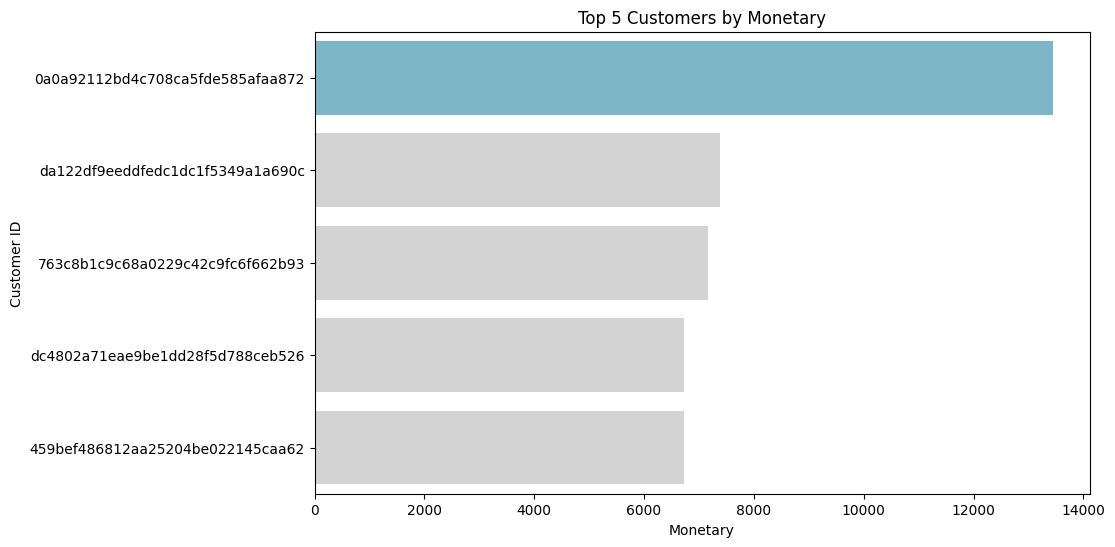

In [97]:
# Plot for Recency
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(10, 6))
top_5_recency = rfm_df.sort_values(by="recency", ascending=True).head(5)
sns.barplot(x="recency", y="customer_id", data=top_5_recency, palette=colors_, hue="customer_id")
plt.title("Top 5 Customers by Recency (days)")
plt.xlabel("Recency (days)")
plt.ylabel("Customer ID")
print("Top 5 Customers by Recency:")
print(top_5_recency)
plt.show()

# Plot for Frequency
plt.figure(figsize=(10, 6))
top_5_frequency = rfm_df.sort_values(by="frequency", ascending=False).head(5)
sns.barplot(x="frequency", y="customer_id", data=top_5_frequency, palette=colors_, hue="customer_id")
plt.title("Top 5 Customers by Frequency")
plt.xlabel("Frequency")
plt.ylabel("Customer ID")
print("\nTop 5 Customers by Frequency:")
print(top_5_frequency)
plt.show()


# Plot for Monetary
plt.figure(figsize=(10, 6))
top_5_monetary = rfm_df.sort_values(by="monetary", ascending=False).head(5)
sns.barplot(x="monetary", y="customer_id", data=top_5_monetary, palette=colors_, hue="customer_id")
plt.title("Top 5 Customers by Monetary")
plt.xlabel("Monetary")
plt.ylabel("Customer ID")
print("\nTop 5 Customers by Monetary:")
print(top_5_monetary)
plt.show()



## Conclusion

- Permintaan penjualan paling banyak terjadi pada bulan apa?

permintaan paling banyak terjadi pada bulan agustus dengan 11115 permintaan pembelian diikuti may dengan 9670 permintaan pembelian kemudian juli dengan 8641 permintaan pembelian. Dengan data ini para stakeholder bisa mempersiapkan ataupun memanfaatkan lonjakan permintaan dari pengguna.
- Apa kategori yang paling laris dan paling tidak laris?

5 kategori yang paling laris : bed_bath_table,health_beauty,sports_leisure,furniture_decor,computers_accessories
5 kategori yang paling tidak laris : security_and_services, fashion_childrens_clothes, cds_dvds_musicals, la_cuisine, arts_and_craftmanship
- produk apa yang memiliki rata - rata review_score paling buruk?

terdapat banyak produk dengan rata rata review paling buruk berupa satu(1) point, dan product tidak memiliki nama sehingga berikut merupakan sebagian product id dengan review paling buruk:

7f7a6b07907da42addc3ec06b4a62cfb    1.0

a8e59319e3c44b5af3a5412d713af5bb    1.0

33fb5f691f9219b5d60d856191aea6a4    1.0

yang berada pada kategori automotif dan baby.

- RFM ANALISIS

### Top 5 Customers by Recency:
| Customer ID                       | Frequency | Monetary | Recency |
|-----------------------------------|-----------|----------|---------|
| ff22e30958c13ffe219db7d711e8f564 | 2         | 290.00   | 44      |
| afbcfd0b9c5233e7ccc73428526fbb52 | 1         | 457.75   | 49      |
| f80013faf776e37bcea7634d59c2181e | 1         | 65.00    | 49      |
| b4dcade04bc548b7e3b0243c801f8c26 | 1         | 99.00    | 49      |
| 0421e7a23f21e5d54efed456aedbc513 | 1         | 109.90   | 49      |

### Top 5 Customers by Frequency:
| Customer ID                       | Frequency | Monetary | Recency |
|-----------------------------------|-----------|----------|---------|
| 8d50f5eadf50201ccdcedfb9e2ac8455 | 16        | 729.62   | 58      |
| 3e43e6105506432c953e165fb2acf44c | 9         | 1000.85  | 232     |
| 1b6c7548a2a1f9037c1fd3ddfed95f33 | 7         | 809.21   | 245     |
| 6469f99c1f9dfae7733b25662e7f1782 | 7         | 664.20   | 111     |
| ca77025e7201e3b30c44b472ff346268 | 7         | 806.61   | 138     |

### Top 5 Customers by Monetary:
| Customer ID                       | Frequency | Monetary | Recency |
|-----------------------------------|-----------|----------|---------|
| 0a0a92112bd4c708ca5fde585afaa872 | 1         | 13440.0  | 383     |
| da122df9eeddfedc1dc1f5349a1a690c | 2         | 7388.0   | 564     |
| 763c8b1c9c68a0229c42c9fc6f662b93 | 1         | 7160.0   | 94      |
| dc4802a71eae9be1dd28f5d788ceb526 | 1         | 6735.0   | 612     |
| 459bef486812aa25204be022145caa62 | 1         | 6729.0   | 84      |
